In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.1/142.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.6/663.6 kB 12.6 MB/s eta 0:00:00


In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
# Used to securely store your API key
from google.colab import userdata

In [4]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=GOOGLE_API_KEY)

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [6]:
model = genai.GenerativeModel('gemini-1.5-pro-latest')

In [12]:


from PIL import Image

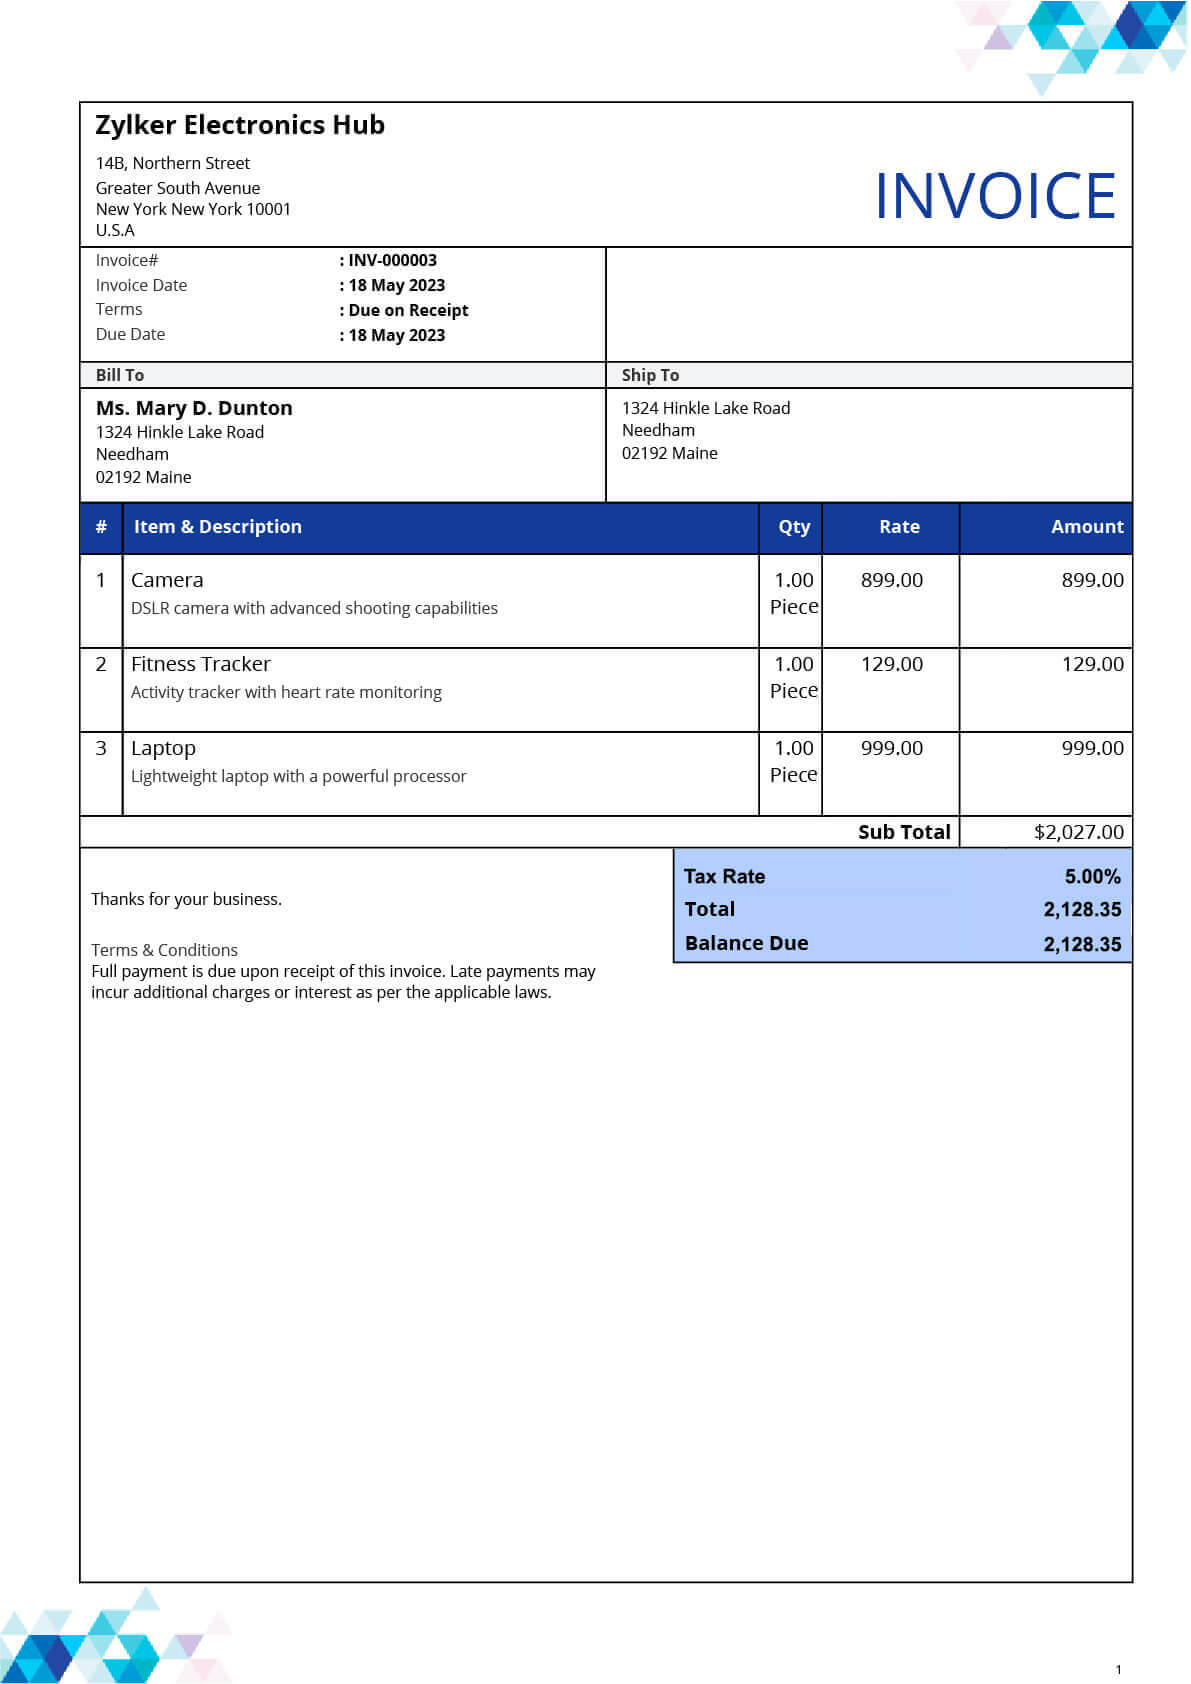

In [51]:
import PIL.Image

img = PIL.Image.open('/content/invoice_new.jpg')
img

In [52]:
response = model.generate_content(["Extract address from the invoice", img], stream=True)
response.resolve()

In [53]:
to_markdown(response.text)

> ## Addresses on the Invoice:
> 
> **Zylker Electronics Hub (Seller):** 
> * 148, Northern Street
> * Greater South Avenue
> * New York, New York 10001
> * U.S.A
> 
> **Ms. Mary D. Dunton (Buyer):**
> * 1324 Hinkle Lake Road
> * Needham
> * 02192 Maine
> 
> **Ship To:**
> * 1324 Hinkle Lake Road
> * Needham 
> * 02192 Maine 


In [54]:
response = model.generate_content(["Give the output in tabular form:Extract product description,unit price,quantity,total amount from the invoice", img], stream=True)
response.resolve()

In [55]:
to_markdown(response.text)

> ## Extracted Invoice Data
> 
> | Item # | Description | Unit Price | Quantity | Amount |
> |---|---|---|---|---|
> | 1 | DSLR camera with advanced shooting capabilities | 899.00 | 1.00 | 899.00 |
> | 2 | Activity tracker with heart rate monitoring | 129.00 | 1.00 | 129.00 |
> | 3 | Lightweight laptop with a powerful processor | 999.00 | 1.00 | 999.00 | 


In [56]:
response = model.generate_content(["Give the output in tabular form:Extract all the information from the invoice", img], stream=True)
response.resolve()

In [57]:
to_markdown(response.text)

> ## Invoice Information
> 
> | Header |  |
> |---|---|
> | **Supplier** | Zylker Electronics Hub |
> |  | 148, Northern Street | 
> |  | Greater South Avenue |
> |  | New York, New York 10001 | 
> |  | U.S.A |
> | **Invoice #** | INV-00003 |
> | **Invoice Date** | 18 May 2023 |
> | **Due Date** | 18 May 2023 |
> | **Bill To** | Ms. Mary D. Dunton |
> |  | 1324 Hinkle Lake Road |
> |  | Needham |
> |  | 02192 Maine | 
> | **Ship To** | 1324 Hinkle Lake Road  |
> |  | Needham | 
> |  | 02192 Maine |
> 
> 
> ## Items Ordered
> 
> | **#** | **Item & Description** | **Qty** | **Rate** | **Amount** |
> |---|---|---|---|---| 
> | 1 | **Camera** |  |  |  |
> |  | DSLR camera with advanced shooting capabilities | 1.00 Piece | 899.00 | 899.00 |
> | 2 | **Fitness Tracker** |  |  |  |
> |  | Activity tracker with heart rate monitoring | 1.00 Piece | 129.00 | 129.00 |
> | 3 | **Laptop** |  |  |  | 
> |  | Lightweight laptop with a powerful processor | 1.00 Piece | 999.00 | 999.00 |
> |  | **Sub Total** |  |  | $2,027.00 |
> 
> 
> ## Invoice Totals
> 
> | **Tax Rate** | 5.00% |
> |---|---|
> | **Total** | 2,128.35 |
> | **Balance Due** | 2,128.35 | 
